In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
df = pd.read_csv('../twitter_data/nonpublic/users_neighborhood.csv')

In [3]:
df.head(5)

,user_id,hate,hate_neigh,normal_neigh,statuses_count,followers_count,followees_count,favorites_count,listed_count,betweenness,...,c_medieval_empath,c_journalism_empath,c_farming_empath,c_plant_empath,c_shopping_empath,c_ship_empath,c_religion_empath,c_tourism_empath,c_power_empath,user_id_original
0,0,normal,True,True,101767,3504,3673,81635,53,100467.895084,...,0.003288,0.000255,0.002189,0.000593,0.003689,0.003559,0.001634,0.002662,0.007487,38772269
1,1,other,False,False,2352,19609,309,61,197,0.000000,...,0.004465,0.000444,0.001632,0.001298,0.002183,0.008969,0.004975,0.000647,0.003419,346944092
2,2,other,False,False,1044,2371,2246,561,16,4897.117853,...,0.005284,0.000554,0.001084,0.001359,0.002041,0.016846,0.004881,0.001214,0.003347,3996817557
3,3,other,False,False,167172,3004,298,3242,53,9.864754,...,0.002061,0.001116,0.001282,0.000000,0.001951,0.015423,0.000446,0.000446,0.005241,202006405
4,4,other,False,False,1998,17643,19355,485,239,0.000000,...,0.035382,0.000317,0.000475,0.000475,0.002431,0.007656,0.033273,0.072792,0.003698,2747251356


In [4]:
u2l = df.set_index('user_id_original').hate
# u2l = u2l[u2l!='other']
# u2l = (u2l == 'hateful').astype(float)

In [5]:
df.hate

0         normal
1          other
2          other
3          other
4          other
           ...  
100381     other
100382     other
100383     other
100384     other
100385    normal
Name: hate, Length: 100386, dtype: object

In [6]:
u2l

user_id_original
38772269              normal
346944092              other
3996817557             other
202006405              other
2747251356             other
                       ...  
25557388               other
297320248              other
442824717              other
270512792              other
745295716432633856    normal
Name: hate, Length: 100386, dtype: object

In [7]:
u2l.value_counts()

other      95415
normal      4427
hateful      544
Name: hate, dtype: int64

In [65]:
df_tweets = pd.read_csv('../twitter_data/nonpublic/tweets.csv',
#         index_col=["date", "loc"], 
        usecols=["user_id", "tweet_id", "rt_flag", "rt_user_id", "rt_status_id"],
        dtype={'user_id':np.int64, 'tweet_id':np.int64, 'rt_flag':np.bool, 'rt_user_id':str, 'rt_status_id':str }
)

df_tweets[['rt_user_id','rt_status_id']] = df_tweets[['rt_user_id','rt_status_id']].fillna("-1").astype(int)

In [10]:
df_tweets.head()

,user_id,tweet_id,rt_flag,rt_status_id,rt_user_id
0,850859913244852224,919445178859053056,False,-1,-1
1,850859913244852224,919441926021107712,False,-1,-1
2,850859913244852224,919367819694927872,True,914499171192852480,258324826
3,850859913244852224,919366633512226816,True,918942340462637056,1289954977
4,850859913244852224,919365144697860096,True,919307568371023872,850408392925499392


In [66]:
rt_tweets = df_tweets[df_tweets.rt_flag == True]

In [12]:
rt_tweets.head()

,user_id,tweet_id,rt_flag,rt_status_id,rt_user_id
2,850859913244852224,919367819694927872,True,914499171192852480,258324826
3,850859913244852224,919366633512226816,True,918942340462637056,1289954977
4,850859913244852224,919365144697860096,True,919307568371023872,850408392925499392
5,850859913244852224,919361129226399745,True,919035144278855680,14677919
6,850859913244852224,919357843345674240,True,919307735488974851,4573876514


In [13]:
print(f'number of retweets: {rt_tweets.shape[0]}')

number of retweets: 7229004


In [67]:
u2u = rt_tweets[['user_id', 'rt_user_id']].drop_duplicates()
print(f'u2u connections: {u2u.shape[0]}')
u2u = u2u.merge(u2l, how='left', left_on='user_id', right_on='user_id_original', suffixes=('', '_tweeting_user'))
u2u = u2u.merge(u2l, how='left', left_on='rt_user_id', right_on='user_id_original', suffixes=('', '_rt_user'))

u2u connections: 4686135


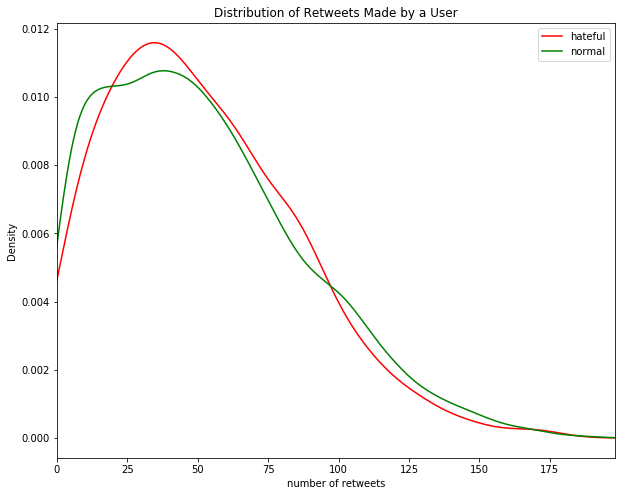

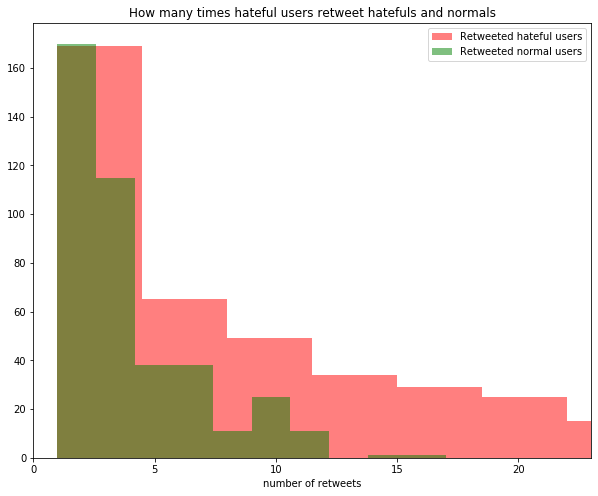

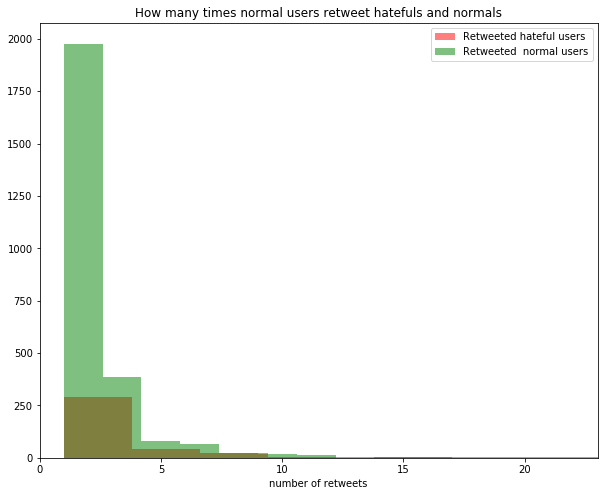

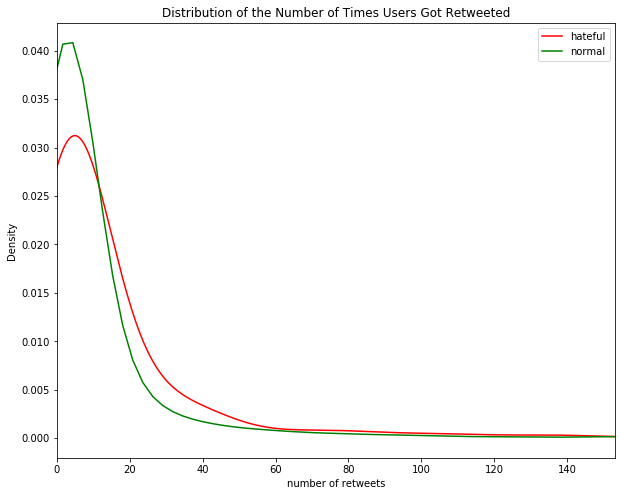

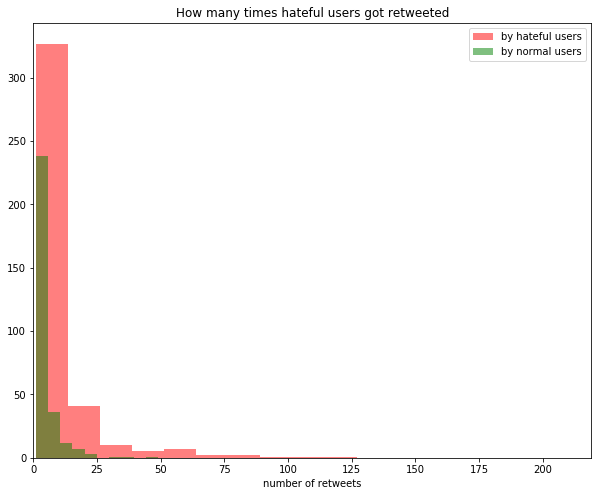

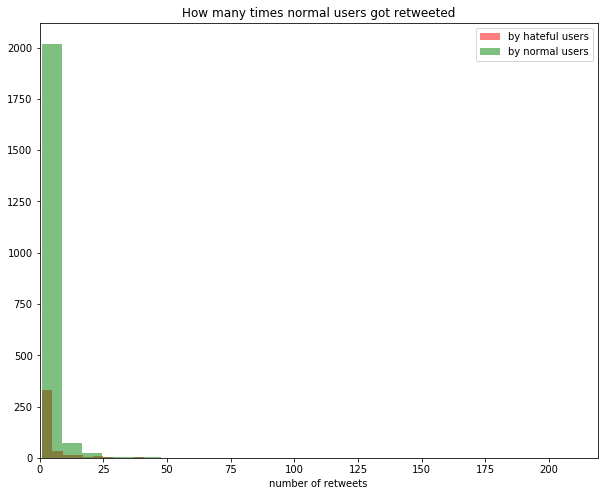

In [70]:
plt.figure(figsize=(10,8))
temp = u2u.groupby(['user_id','hate']).size()
temp[temp.index.get_level_values('hate') == 'hateful'].plot.kde(label='hateful', c='r')
temp[temp.index.get_level_values('hate') == 'normal'].plot.kde(label='normal', c='g')
plt.legend(loc='best')
plt.title('Distribution of Retweets Made by a User')
plt.xlabel('number of retweets')
plt.xlim(left=0, right=temp.max())
plt.show()

plt.figure(figsize=(10,8))
temp = u2u[u2u.hate_rt_user=='hateful'].groupby(['user_id','hate']).size()
plt.hist(temp[temp.index.get_level_values('hate') == 'hateful'].values, alpha=0.5, label='Retweeted hateful users', color='r')
temp = u2u[u2u.hate_rt_user=='normal'].groupby(['user_id','hate']).size()
plt.hist(temp[temp.index.get_level_values('hate') == 'hateful'].values, alpha=0.5, label='Retweeted normal users', color='g')
plt.legend(loc='best')
plt.title('How many times hateful users retweet hatefuls and normals')
plt.xlabel('number of retweets')
plt.xlim(left=0, right=temp.max())
plt.show()

plt.figure(figsize=(10,8))
temp = u2u[u2u.hate_rt_user=='hateful'].groupby(['user_id','hate']).size()
plt.hist(temp[temp.index.get_level_values('hate') == 'normal'].values, alpha=0.5, label='Retweeted hateful users', color='r')
temp = u2u[u2u.hate_rt_user=='normal'].groupby(['user_id','hate']).size()
plt.hist(temp[temp.index.get_level_values('hate') == 'normal'].values, alpha=0.5, label='Retweeted  normal users', color='g')
plt.legend(loc='best')
plt.title('How many times normal users retweet hatefuls and normals')
plt.xlabel('number of retweets')
plt.xlim(left=0, right=temp.max())
plt.show()



plt.figure(figsize=(10,8))
temp = u2u.groupby(['rt_user_id','hate_rt_user']).size()
temp[temp.index.get_level_values('hate_rt_user') == 'hateful'].plot.kde(label='hateful', c='r')
temp[temp.index.get_level_values('hate_rt_user') == 'normal'].plot.kde(label='normal', c='g')
plt.legend(loc='best')
plt.title('Distribution of the Number of Times Users Got Retweeted')
plt.xlabel('number of retweets')
plt.xlim(left=0, right=temp.quantile(.975))
plt.show()

plt.figure(figsize=(10,8))
temp = u2u[u2u.hate=='hateful'].groupby(['rt_user_id','hate_rt_user']).size()
plt.hist(temp[temp.index.get_level_values('hate_rt_user') == 'hateful'].values, alpha=0.5, label='by hateful users', color='r')
temp = u2u[u2u.hate=='normal'].groupby(['rt_user_id','hate_rt_user']).size()
plt.hist(temp[temp.index.get_level_values('hate_rt_user') == 'hateful'].values, alpha=0.5, label='by normal users', color='g')
plt.legend(loc='best')
plt.title('How many times hateful users got retweeted')
plt.xlabel('number of retweets')
plt.xlim(left=0, right=temp.max())
plt.show()

plt.figure(figsize=(10,8))
temp = u2u[u2u.hate=='hateful'].groupby(['rt_user_id','hate_rt_user']).size()
plt.hist(temp[temp.index.get_level_values('hate_rt_user') == 'normal'].values, alpha=0.5, label='by hateful users', color='r')
temp = u2u[u2u.hate=='normal'].groupby(['rt_user_id','hate_rt_user']).size()
plt.hist(temp[temp.index.get_level_values('hate_rt_user') == 'normal'].values, alpha=0.5, label='by normal users', color='g')
plt.legend(loc='best')
plt.title('How many times normal users got retweeted')
plt.xlabel('number of retweets')
plt.xlim(left=0, right=temp.max())
plt.show()

replies

In [87]:
df_tweets = pd.read_csv('../twitter_data/nonpublic/tweets.csv',
#         index_col=["date", "loc"], 
        usecols=["user_id", "tweet_id", "rp_flag", "rp_user", "rp_status"],
        dtype={'user_id':np.int64, 'tweet_id':np.int64, 'rp_flag':np.bool, 'rp_user':str, 'rp_status':str }
)

df_tweets['rp_user'] = pd.to_numeric(df_tweets['rp_user'], downcast='integer', errors='coerce').fillna(-1)
df_tweets['rp_status'] = pd.to_numeric(df_tweets['rp_status'], downcast='integer', errors='coerce').fillna(-1)

In [88]:
rp_tweets = df_tweets[df_tweets.rp_flag == True]

In [91]:
u2u = rp_tweets[['user_id', 'rp_user']].drop_duplicates()
print(f'u2u connections: {u2u.shape[0]}')
u2u = u2u.merge(u2l, how='left', left_on='user_id', right_on='user_id_original', suffixes=('', '_tweeting_user'))
u2u = u2u.merge(u2l, how='left', left_on='rp_user', right_on='user_id_original', suffixes=('', '_rp_user'))

u2u connections: 2257385


In [96]:
(rp_tweets.rp_status<0).shape

(4046662,)

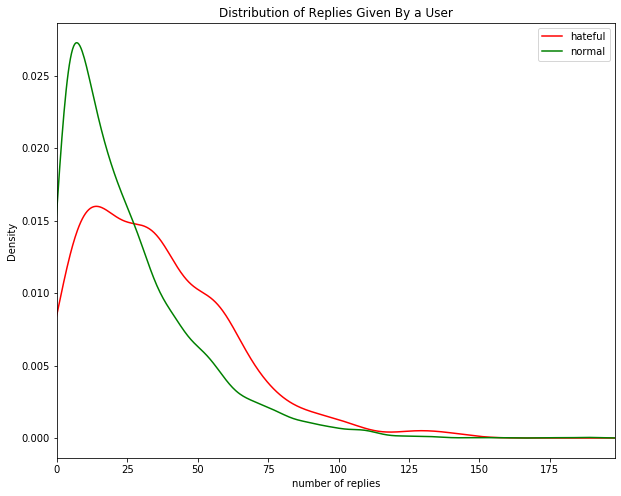

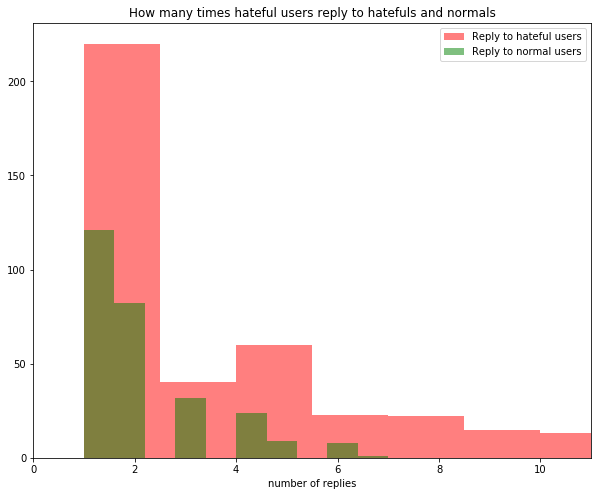

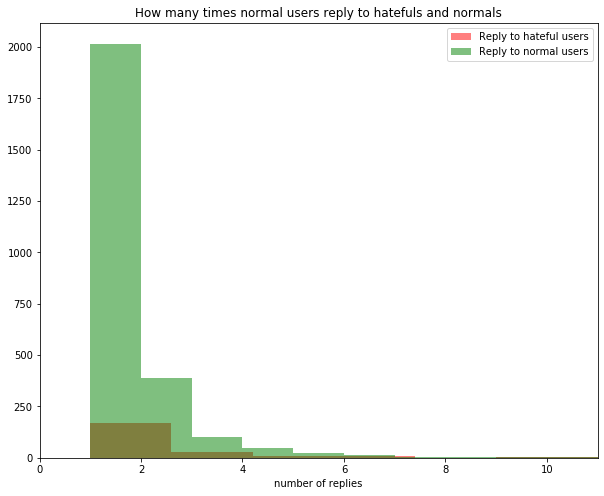

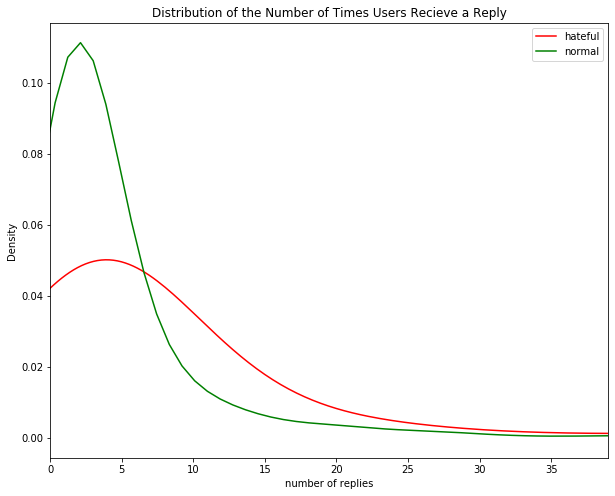

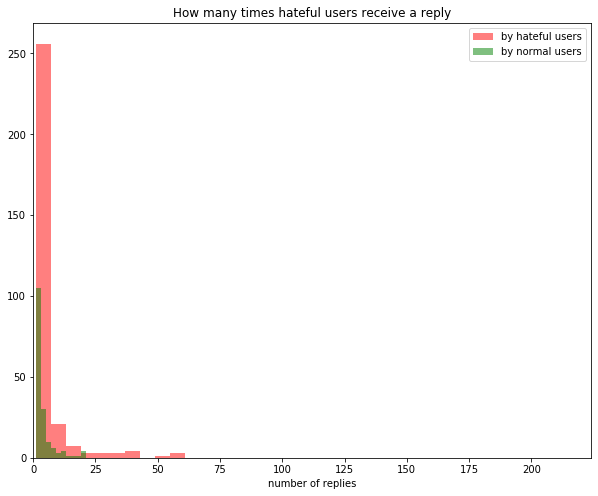

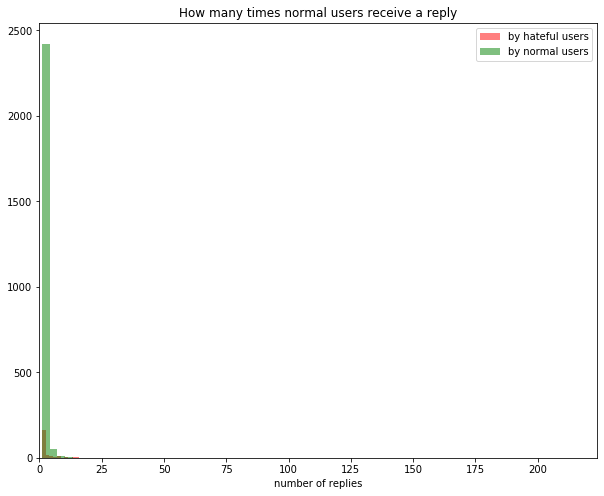

In [74]:
plt.figure(figsize=(10,8))
temp = u2u.groupby(['user_id','hate']).size()
temp[temp.index.get_level_values('hate') == 'hateful'].plot.kde(label='hateful', c='r')
temp[temp.index.get_level_values('hate') == 'normal'].plot.kde(label='normal', c='g')
plt.legend(loc='best')
plt.title('Distribution of Replies Given By a User')
plt.xlabel('number of replies')
plt.xlim(left=0, right=temp.max())
plt.show()

plt.figure(figsize=(10,8))
temp = u2u[u2u.hate_rp_user=='hateful'].groupby(['user_id','hate']).size()
plt.hist(temp[temp.index.get_level_values('hate') == 'hateful'].values, alpha=0.5, label='Reply to hateful users', color='r')
temp = u2u[u2u.hate_rp_user=='normal'].groupby(['user_id','hate']).size()
plt.hist(temp[temp.index.get_level_values('hate') == 'hateful'].values, alpha=0.5, label='Reply to normal users', color='g')
plt.legend(loc='best')
plt.title('How many times hateful users reply to hatefuls and normals')
plt.xlabel('number of replies')
plt.xlim(left=0, right=temp.max())
plt.show()

plt.figure(figsize=(10,8))
temp = u2u[u2u.hate_rp_user=='hateful'].groupby(['user_id','hate']).size()
plt.hist(temp[temp.index.get_level_values('hate') == 'normal'].values, alpha=0.5, label='Reply to hateful users', color='r')
temp = u2u[u2u.hate_rp_user=='normal'].groupby(['user_id','hate']).size()
plt.hist(temp[temp.index.get_level_values('hate') == 'normal'].values, alpha=0.5, label='Reply to normal users', color='g')
plt.legend(loc='best')
plt.title('How many times normal users reply to hatefuls and normals')
plt.xlabel('number of replies')
plt.xlim(left=0, right=temp.max())
plt.show()



plt.figure(figsize=(10,8))
temp = u2u.groupby(['rp_user','hate_rp_user']).size()
temp[temp.index.get_level_values('hate_rp_user') == 'hateful'].plot.kde(label='hateful', c='r')
temp[temp.index.get_level_values('hate_rp_user') == 'normal'].plot.kde(label='normal', c='g')
plt.legend(loc='best')
plt.title('Distribution of the Number of Times Users Recieve a Reply')
plt.xlabel('number of replies')
plt.xlim(left=0, right=temp.quantile(.975))
plt.show()

plt.figure(figsize=(10,8))
temp = u2u[u2u.hate=='hateful'].groupby(['rp_user','hate_rp_user']).size()
plt.hist(temp[temp.index.get_level_values('hate_rp_user') == 'hateful'].values, alpha=0.5, label='by hateful users', color='r')
temp = u2u[u2u.hate=='normal'].groupby(['rp_user','hate_rp_user']).size()
plt.hist(temp[temp.index.get_level_values('hate_rp_user') == 'hateful'].values, alpha=0.5, label='by normal users', color='g')
plt.legend(loc='best')
plt.title('How many times hateful users receive a reply')
plt.xlabel('number of replies')
plt.xlim(left=0, right=temp.max())
plt.show()

plt.figure(figsize=(10,8))
temp = u2u[u2u.hate=='hateful'].groupby(['rp_user','hate_rp_user']).size()
plt.hist(temp[temp.index.get_level_values('hate_rp_user') == 'normal'].values, alpha=0.5, label='by hateful users', color='r')
temp = u2u[u2u.hate=='normal'].groupby(['rp_user','hate_rp_user']).size()
plt.hist(temp[temp.index.get_level_values('hate_rp_user') == 'normal'].values, alpha=0.5, label='by normal users', color='g')
plt.legend(loc='best')
plt.title('How many times normal users receive a reply')
plt.xlabel('number of replies')
plt.xlim(left=0, right=temp.max())
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
temp = u2u[u2u.hate_rt_user=='hateful'].groupby(['user_id','hate']).size()
temp[temp.index.get_level_values('hate') == 'hateful'].plot.kde(label='hateful')
temp[temp.index.get_level_values('hate') == 'normal'].plot.kde(label='normal')
# temp[temp.index.get_level_values('hate') == 'other'].plot.kde(label='unlabeled')
plt.legend(loc='best')
plt.title('Distribution of Retweets from Hateful Users')
plt.xlabel('number of retweets')

In [49]:
# number of edges - quantiles
u2u.groupby(['user_id','hate']).size().groupby(['hate']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

,0.10,0.25,0.50,0.75,0.90
hate,,,,,
hateful,11.0,25.5,47.0,72.5,96.0
normal,9.0,23.0,47.0,74.0,103.0
other,8.0,21.0,42.0,69.0,97.0


In [ ]:
u2u.groupby(['user_id','hate']).size().groupby(['hate']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

In [51]:
# number of edges - quantiles
u2u[u2u.hate_rt_user=='hateful'].groupby(['user_id','hate']).size().groupby(['hate']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

,0.10,0.25,0.50,0.75,0.90
hate,,,,,
hateful,1.0,2.0,6.0,13.0,20.0
normal,1.0,1.0,1.0,3.0,7.0
other,1.0,1.0,1.0,1.0,3.0


In [52]:
u2u[u2u.hate_rt_user=='normal'].groupby(['user_id','hate']).size().groupby(['hate']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

,0.10,0.25,0.50,0.75,0.90
hate,,,,,
hateful,1.0,2.0,3.0,5.0,8.0
normal,1.0,1.0,1.0,2.0,4.0
other,1.0,1.0,1.0,2.0,3.0


In [55]:
u2u[u2u.hate_rt_user=='other'].groupby(['user_id','hate']).size().groupby(['hate']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

,0.10,0.25,0.50,0.75,0.90
hate,,,,,
hateful,3.0,7.0,16.0,30.0,50.0
normal,3.0,7.0,17.0,35.0,59.0
other,3.0,6.0,15.0,32.0,55.0


In [57]:
u2u[pd.isna(u2u.hate_rt_user)].groupby(['user_id','hate']).size().groupby(['hate']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

,0.10,0.25,0.50,0.75,0.90
hate,,,,,
hateful,4.0,9.0,18.0,29.0,42.0
normal,5.0,12.0,24.0,39.0,54.0
other,4.0,10.0,21.0,37.0,53.0


How much are they retweeted

In [59]:
# number of edges - quantiles
u2u.groupby(['rt_user_id','hate_rt_user']).size().groupby(['hate_rt_user']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

,0.10,0.25,0.50,0.75,0.90
hate_rt_user,,,,,
hateful,1.0,2.0,5.0,14.5,38.0
normal,1.0,1.0,3.0,7.0,23.0
other,1.0,2.0,5.0,17.0,50.0


In [60]:
# number of edges - quantiles
u2u[u2u.hate=='normal'].groupby(['rt_user_id','hate_rt_user']).size().groupby(['hate_rt_user']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

,0.10,0.25,0.50,0.75,0.90
hate_rt_user,,,,,
hateful,1.0,1.0,2.0,4.0,9.0
normal,1.0,1.0,1.0,2.0,5.0
other,1.0,1.0,2.0,3.0,7.0


In [61]:
# number of edges - quantiles
u2u[u2u.hate=='hateful'].groupby(['rt_user_id','hate_rt_user']).size().groupby(['hate_rt_user']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

,0.10,0.25,0.50,0.75,0.90
hate_rt_user,,,,,
hateful,1.0,1.0,3.0,8.0,22.0
normal,1.0,1.0,1.0,3.0,9.9
other,1.0,1.0,1.0,2.0,4.0


In [62]:
# number of edges - quantiles
u2u[u2u.hate=='other'].groupby(['rt_user_id','hate_rt_user']).size().groupby(['hate_rt_user']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

,0.10,0.25,0.50,0.75,0.90
hate_rt_user,,,,,
hateful,1.0,1.0,3.0,8.0,22.3
normal,1.0,1.0,2.0,6.0,20.0
other,1.0,2.0,5.0,17.0,48.0


In [ ]:
# number of edges - quantiles
u2u.groupby(['rt_user_id','hate_rt_user']).size().groupby(['hate_rt_user']).quantile([.1,0.25, 0.5, 0.75,.9]).unstack(1)

In [58]:
u2u.head()

,user_id,rt_user_id,hate,hate_rt_user
0,850859913244852224,258324826,hateful,normal
1,850859913244852224,1289954977,hateful,NaN
2,850859913244852224,850408392925499392,hateful,hateful
3,850859913244852224,14677919,hateful,other
4,850859913244852224,4573876514,hateful,NaN


In [26]:
df_tweets[df_tweets.rt_flag==1].head()

,user_id,tweet_id,rt_flag,rt_status_id,rt_user_id
2,850859913244852224,919367819694927872,True,9.144992e+17,2.583248e+08
3,850859913244852224,919366633512226816,True,9.189423e+17,1.289955e+09
4,850859913244852224,919365144697860096,True,9.193076e+17,8.504084e+17
5,850859913244852224,919361129226399745,True,9.190351e+17,1.467792e+07
6,850859913244852224,919357843345674240,True,9.193077e+17,4.573877e+09


In [9]:
list(df.columns)

['user_id',
 'hate',
 'hate_neigh',
 'normal_neigh',
 'statuses_count',
 'followers_count',
 'followees_count',
 'favorites_count',
 'listed_count',
 'betweenness',
 'eigenvector',
 'in_degree',
 'out_degree',
 'negotiate_empath',
 'vehicle_empath',
 'science_empath',
 'timidity_empath',
 'gain_empath',
 'swearing_terms_empath',
 'office_empath',
 'tourism_empath',
 'computer_empath',
 'violence_empath',
 'horror_empath',
 'dispute_empath',
 'sadness_empath',
 'internet_empath',
 'college_empath',
 'attractive_empath',
 'plant_empath',
 'technology_empath',
 'reading_empath',
 'deception_empath',
 'ancient_empath',
 'ship_empath',
 'messaging_empath',
 'surprise_empath',
 'occupation_empath',
 'hearing_empath',
 'furniture_empath',
 'restaurant_empath',
 'domestic_work_empath',
 'art_empath',
 'pet_empath',
 'air_travel_empath',
 'dance_empath',
 'healing_empath',
 'smell_empath',
 'sympathy_empath',
 'anger_empath',
 'neglect_empath',
 'farming_empath',
 'clothing_empath',
 'wedding_e

In [ ]:
df.